In [1]:
# Investigate the correlation between movie genre and gross revenue 
# Explore the correlation between movie genre and the number of votes received
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/sergeibogdanov/Downloads/Data Analyst/Python Data Analyst Project/movies.csv')

In [2]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
# Replace NaN values with 0
df['budget'].fillna(0, inplace=True)
df['gross'].fillna(0, inplace=True)
df['released'].fillna(0, inplace=True)

# Replace infinity values with a large number (or 0, depending on your needs)
df['budget'].replace([np.inf, -np.inf], 1e9, inplace=True)
df['gross'].replace([np.inf, -np.inf], 1e9, inplace=True)
df['released'].replace([np.inf, -np.inf], 1e9, inplace=True)

# Convert the columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [6]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [7]:
# Extract the year using a regular expression
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')
# Replace NaN values with 0
df['yearcorrect'].fillna(0, inplace=True)

In [8]:
# Convert the 'year' column to an integer data type
df['yearcorrect'] = df['yearcorrect'].astype('int')
print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int64
dtype: object


In [9]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [11]:
# Budget high correlation
# Company high correlation


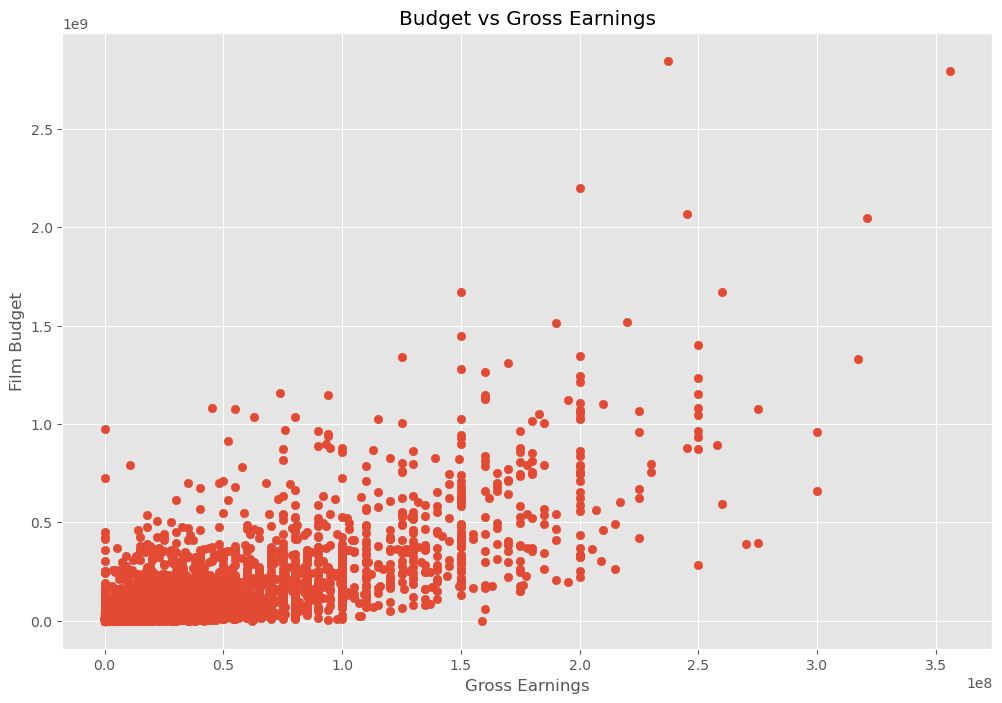

In [12]:
# Scatter plot with budget vs gross 

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Film Budget')

plt.show()





In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

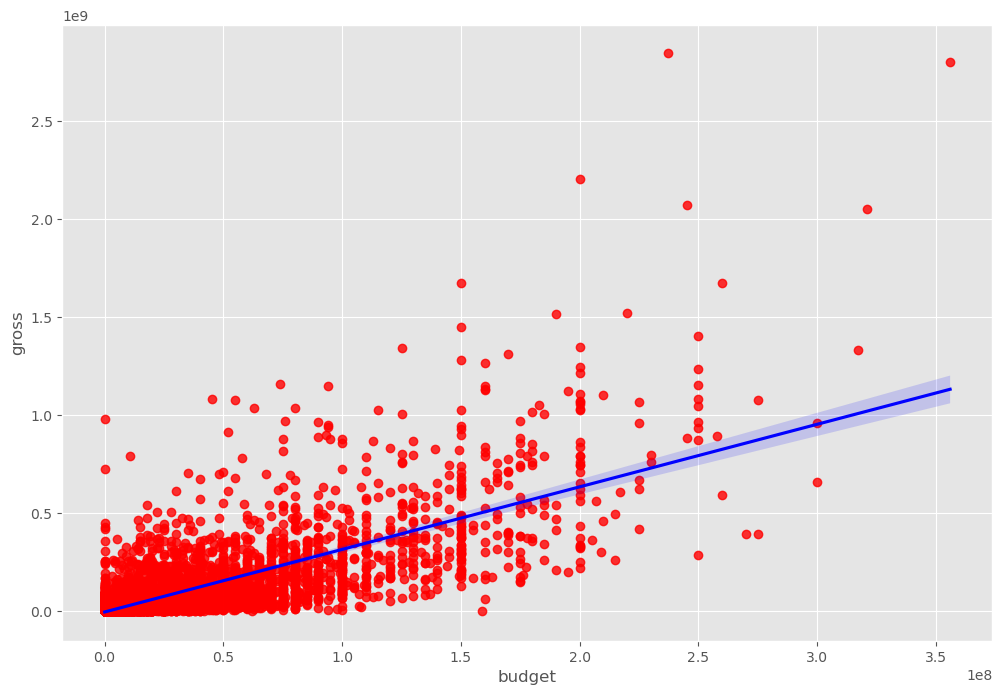

In [14]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color": "blue" })

In [15]:
# Let's start looking at correlation

In [16]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation using the desired method (e.g., 'spearman')
correlation_matrix = numeric_columns.corr(method='pearson')

correlation_matrix.corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,-0.502809,-0.319633,0.008585,-0.125706,-0.510357,0.216702
score,-0.502809,1.000000,0.211110,-0.485604,-0.275316,0.375363,-0.469020
votes,-0.319633,0.211110,1.000000,0.473860,0.690897,0.001955,-0.649799
budget,0.008585,-0.485604,0.473860,1.000000,0.886136,-0.164389,-0.414697
gross,-0.125706,-0.275316,0.690897,0.886136,1.000000,-0.176854,-0.518573
runtime,-0.510357,0.375363,0.001955,-0.164389,-0.176854,1.000000,-0.394461
yearcorrect,0.216702,-0.469020,-0.649799,-0.414697,-0.518573,-0.394461,1.000000


In [17]:
# High correlation between budget and gross

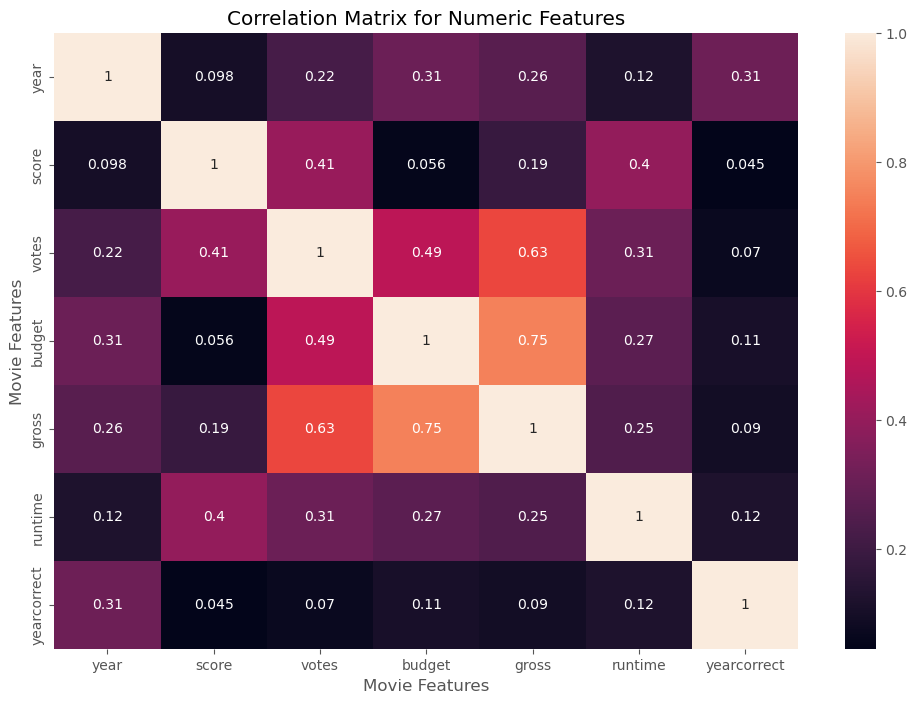

In [23]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [21]:
# Looks at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [24]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1278,4.5,274.0,117,82,2797,55,0,0,1159,92.0,1990
1614,1745,6,10,1989,56,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,1989
1606,2691,6,8,1989,258,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,1989
1601,3836,-1,4,1989,1161,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,1990


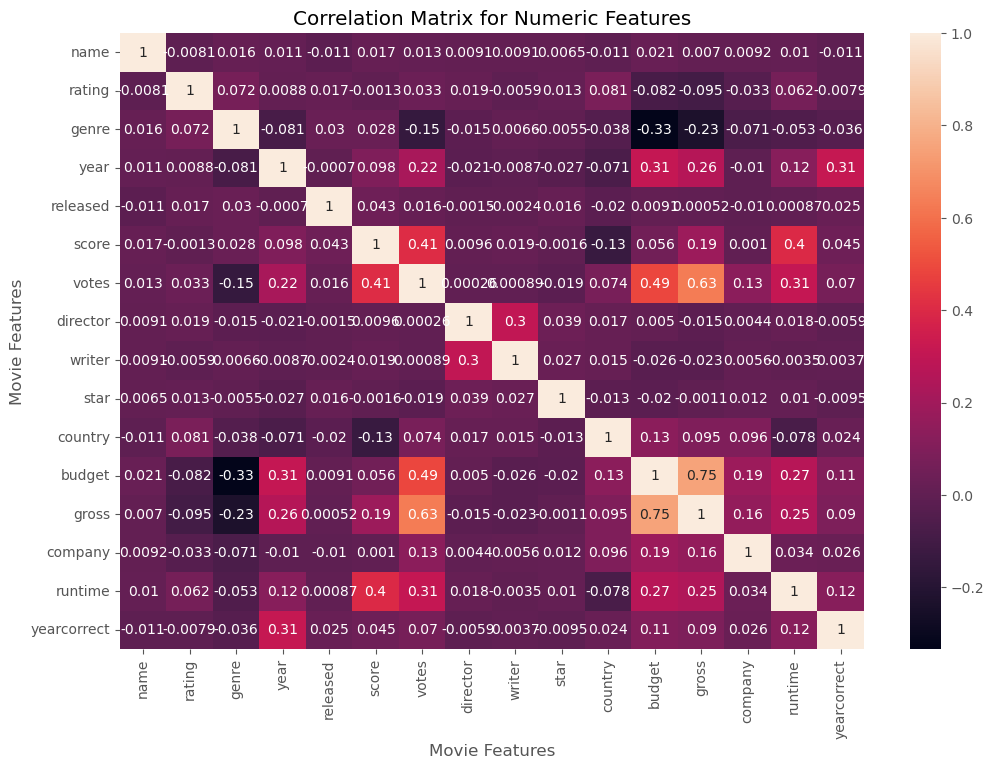

In [27]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')
plt.show()

In [37]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.108069
             gross          0.090394
             company        0.025615
             runtime        0.120636
             yearcorrect    1.000000
Length: 256, dtype: float64

In [40]:
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.632834
votes        gross          0.632834
budget       gross          0.750157
gross        budget         0.750157
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correllation to gross earnings